In [21]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Dense(20,input_dim=5 , activation='relu'))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam", metrics=['mean_squared_error'])


In [23]:
# from keras_visualizer import visualizer
# visualizer(model,file_name="sohrab",file_format="png")

In [ ]:
df=pd.read_csv(r"D:\sohrab\github\ai\co2.csv")
df.head(10)

,engine,cylandr,fuelcomb,out1
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [25]:
df.describe()

,engine,cylandr,fuelcomb,out1
count,500.000000,500.000000,500.000000,500.000000
mean,3.600400,6.132000,12.476600,268.026000
std,1.478191,1.832291,3.943025,67.099673
min,1.000000,4.000000,4.800000,110.000000
25%,2.000000,4.000000,9.500000,217.000000
50%,3.600000,6.000000,11.650000,260.000000
75%,5.000000,8.000000,14.800000,317.000000
max,6.800000,12.000000,25.800000,488.000000


In [26]:
x=df.drop("out1",axis=1)
y=df.out1

In [27]:
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.8)



In [28]:
h=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 79741.4766 - mean_squared_error: 79741.4766
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 79395.0625 - mean_squared_error: 79395.0625
Epoch 3/100
13/13 [==============================] - 0s 833us/step - loss: 79069.0234 - mean_squared_error: 79069.0234
Epoch 4/100
13/13 [==============================] - 0s 750us/step - loss: 78743.2031 - mean_squared_error: 78743.2031
Epoch 5/100
13/13 [==============================] - 0s 918us/step - loss: 78435.2188 - mean_squared_error: 78435.2188
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 78132.9922 - mean_squared_error: 78132.9922
Epoch 7/100
13/13 [==============================] - 0s 667us/step - loss: 77837.3125 - mean_squared_error: 77837.3125
Epoch 8/100
13/13 [==============================] - 0s 834us/step - loss: 77548.6328 - mean_squared_error: 77548.6328
Epoch 9/100
13/13 [==============================] - 0

In [29]:
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 667us/step


In [30]:
y_pred

array([[ 94.47789 ],
       [110.17587 ],
       [138.67648 ],
       [191.9499  ],
       [ 96.40292 ],
       [ 99.473724],
       [157.04434 ],
       [138.67648 ],
       [110.81755 ],
       [137.86282 ],
       [176.32907 ],
       [167.03949 ],
       [200.60126 ],
       [239.74359 ],
       [170.58836 ],
       [113.521835],
       [200.60126 ],
       [ 94.47789 ],
       [ 89.779785],
       [112.10091 ],
       [110.955124],
       [190.59778 ],
       [112.880165],
       [103.896675],
       [144.24521 ],
       [102.040436],
       [170.75197 ],
       [101.32997 ],
       [140.39514 ],
       [109.16768 ],
       [151.30365 ],
       [195.1583  ],
       [149.9859  ],
       [158.39648 ],
       [ 93.194534],
       [ 94.47789 ],
       [183.27597 ],
       [113.384254],
       [242.00073 ],
       [105.82172 ],
       [151.51003 ],
       [101.158005],
       [212.79312 ],
       [212.79312 ],
       [105.68413 ],
       [174.39568 ],
       [170.55397 ],
       [155.5

In [31]:
y_test

252    184
155    218
34     258
462    329
257    191
      ... 
75     437
489    166
456    270
263    317
108    292
Name: out1, Length: 100, dtype: int64

In [32]:
test=np.array([[3,6,13.1,8.8,11.2]])
pred=model.predict(test)
pred


ValueError: in user code:

    File "C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 5)


In [ ]:
import matplotlib.pyplot as plt
h.history['loss']

[49686.0390625,
 22001.13671875,
 4456.3662109375,
 744.4248657226562,
 531.7413330078125,
 528.07373046875,
 526.9437866210938,
 526.4072875976562,
 525.1231079101562,
 524.0468139648438,
 522.5464477539062,
 521.4539794921875,
 519.7442016601562,
 517.9705810546875,
 516.374267578125,
 514.7201538085938,
 512.5496826171875,
 510.0181579589844,
 508.0094909667969,
 506.2765197753906,
 502.6463623046875,
 499.8024597167969,
 495.5747985839844,
 492.862548828125,
 489.06536865234375,
 485.58349609375,
 482.7841491699219,
 477.15093994140625,
 474.24078369140625,
 469.04736328125,
 462.3160400390625,
 460.84588623046875,
 455.0269470214844,
 448.67462158203125,
 444.8826599121094,
 440.8865051269531,
 434.6638488769531,
 430.8641662597656,
 425.365234375,
 421.1186218261719,
 415.5752258300781,
 411.8584899902344,
 408.1282653808594,
 403.3871765136719,
 399.4084167480469,
 395.8199462890625,
 391.44122314453125,
 386.7868957519531,
 383.6646423339844,
 378.7646484375,
 375.5434265136719

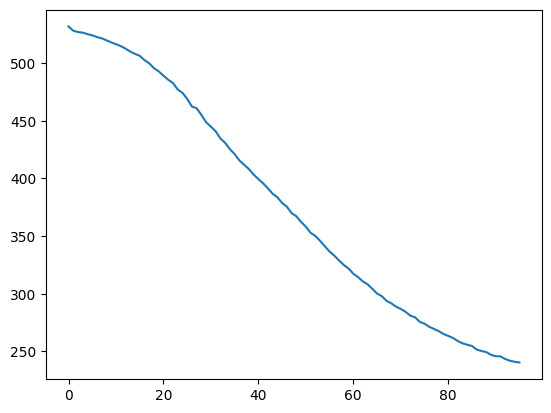

In [ ]:
plt.plot(h.history['loss'][4::])